In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field
from dotenv import load_dotenv
import os
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.checkpoint.memory import MemorySaver
import operator

In [4]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [5]:
llm = ChatGroq(
    model=os.getenv("model"),
    api_key=os.getenv("api_key")
)
def chatModel(state : ChatState):
    message = state["messages"]
    response = llm.invoke(message)
    return {'messages' : [response]}

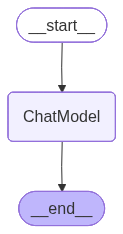

In [14]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node("ChatModel", chatModel)
graph.add_edge(START, "ChatModel")
graph.add_edge("ChatModel", END)

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [7]:
config = {'configurable' : {'thread_id' : 1}}
intial = {'messages' : [(HumanMessage(content='What is pytorch?'))]}
workflow.invoke(intial, config=config)

{'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='18392c36-0721-409b-a563-a5f4ede3b5f5'),
  AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (“define‑by‑run”), which make debugging and model development intuitive.\n- A rich set of **neural‑network building blocks** (layers, loss functions, optimizers) via the `torch.nn` module.\n- **Automatic differentiation** (`autograd`) that automatically computes gradients for back‑propagation.\n- An ecosystem of tools for **vision, text, and audio** (e.g., `torchvision`, `torchtext`, `torchaudio`) and support for **distributed training**.\n\nIn short, PyTorch is a flexible, Python‑friendly framework for building and training deep‑learning models.', additional_kwargs={}, response_

In [8]:
thread_id1 = 1
thread_id2 = 2
while True:
    query = input("type here")

    if query.strip().lower() in ["exit", "bye", "quit"]:
        break
    else:
        config = {'configurable' : {'thread_id' : thread_id1}}
        print("User: ",query)
        print("AI: ",workflow.invoke({"messages" : [HumanMessage(content=query)]}, config=config)['messages'][-1].content)
        

User:  hello
AI:  Hello! How can I help you today?


In [9]:
convo = workflow.get_state(config=config)
print(convo)
convo = convo.values['messages']
convo


StateSnapshot(values={'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='18392c36-0721-409b-a563-a5f4ede3b5f5'), AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (“define‑by‑run”), which make debugging and model development intuitive.\n- A rich set of **neural‑network building blocks** (layers, loss functions, optimizers) via the `torch.nn` module.\n- **Automatic differentiation** (`autograd`) that automatically computes gradients for back‑propagation.\n- An ecosystem of tools for **vision, text, and audio** (e.g., `torchvision`, `torchtext`, `torchaudio`) and support for **distributed training**.\n\nIn short, PyTorch is a flexible, Python‑friendly framework for building and training deep‑learning models.', additional_k

[HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='18392c36-0721-409b-a563-a5f4ede3b5f5'),
 AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (“define‑by‑run”), which make debugging and model development intuitive.\n- A rich set of **neural‑network building blocks** (layers, loss functions, optimizers) via the `torch.nn` module.\n- **Automatic differentiation** (`autograd`) that automatically computes gradients for back‑propagation.\n- An ecosystem of tools for **vision, text, and audio** (e.g., `torchvision`, `torchtext`, `torchaudio`) and support for **distributed training**.\n\nIn short, PyTorch is a flexible, Python‑friendly framework for building and training deep‑learning models.', additional_kwargs={}, response_metadata={'tok

In [10]:
list(workflow.get_state_history(config=config))

[StateSnapshot(values={'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='18392c36-0721-409b-a563-a5f4ede3b5f5'), AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (“define‑by‑run”), which make debugging and model development intuitive.\n- A rich set of **neural‑network building blocks** (layers, loss functions, optimizers) via the `torch.nn` module.\n- **Automatic differentiation** (`autograd`) that automatically computes gradients for back‑propagation.\n- An ecosystem of tools for **vision, text, and audio** (e.g., `torchvision`, `torchtext`, `torchaudio`) and support for **distributed training**.\n\nIn short, PyTorch is a flexible, Python‑friendly framework for building and training deep‑learning models.', additional_

In [11]:
convo

[HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='18392c36-0721-409b-a563-a5f4ede3b5f5'),
 AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (“define‑by‑run”), which make debugging and model development intuitive.\n- A rich set of **neural‑network building blocks** (layers, loss functions, optimizers) via the `torch.nn` module.\n- **Automatic differentiation** (`autograd`) that automatically computes gradients for back‑propagation.\n- An ecosystem of tools for **vision, text, and audio** (e.g., `torchvision`, `torchtext`, `torchaudio`) and support for **distributed training**.\n\nIn short, PyTorch is a flexible, Python‑friendly framework for building and training deep‑learning models.', additional_kwargs={}, response_metadata={'tok

In [13]:
messages = []
for msg in convo:
    if isinstance(msg, HumanMessage):
        messages.append({'role' : "User", "content" : msg.content})
    else:
        messages.append({'role' : "Assistant", "content" : msg.content})

for msg in messages:
    print(msg)

{'role': 'User', 'content': 'What is pytorch?'}
{'role': 'Assistant', 'content': '**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (“define‑by‑run”), which make debugging and model development intuitive.\n- A rich set of **neural‑network building blocks** (layers, loss functions, optimizers) via the `torch.nn` module.\n- **Automatic differentiation** (`autograd`) that automatically computes gradients for back‑propagation.\n- An ecosystem of tools for **vision, text, and audio** (e.g., `torchvision`, `torchtext`, `torchaudio`) and support for **distributed training**.\n\nIn short, PyTorch is a flexible, Python‑friendly framework for building and training deep‑learning models.'}
{'role': 'User', 'content': 'hello'}
{'role': 'Assistant', 'content': 'Hello! How can I help you today?'}
